# Predicting Bank Loan Eligibility Using Machine Learning Models and Comparison Analysis

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from kmodes.kprototypes import KPrototypes
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

## Feature Selection 

_Importing the dataset_

In [2]:
# Here we use this chunk of code in order to display all the columns when showing the dataset as data frames.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv(r"C:\Users\USER\Documents\Reasearch 2\DATA\application_train.csv") 
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


*Dropping the columns with terms 'MODE', 'MEDI', 'AVG' since all those colums interprit the Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor.* Main reason to drop these columns are there wasn't any significant correlation observed after running a SHAP (Shapley Additive Explanations) model and did identified that there were many inter correlations.

In [5]:
substrings_to_drop = ['MODE', 'MEDI', 'AVG']

columns_to_drop = [col for col in data.columns if any(sub in col for sub in substrings_to_drop)]

data.drop(columns=columns_to_drop, inplace=True)

print(data.info())

print(columns_to_drop)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


*Checking the corelation of the columns with the target column "TARGET" & dropping the columns below the treshold value after setting an treshold value*

In [7]:
numerical_df = data.select_dtypes(include=['number'])

correlations = numerical_df.corr()['TARGET'].sort_values(ascending=False)

print(correlations)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


threshld = 0.04 was selected by doing hyper parameter tuninig 

In [8]:
threshold = 0.04

significant_correlations = correlations[(correlations > threshold) | (correlations < -threshold)]

print(significant_correlations)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, dtype: float64


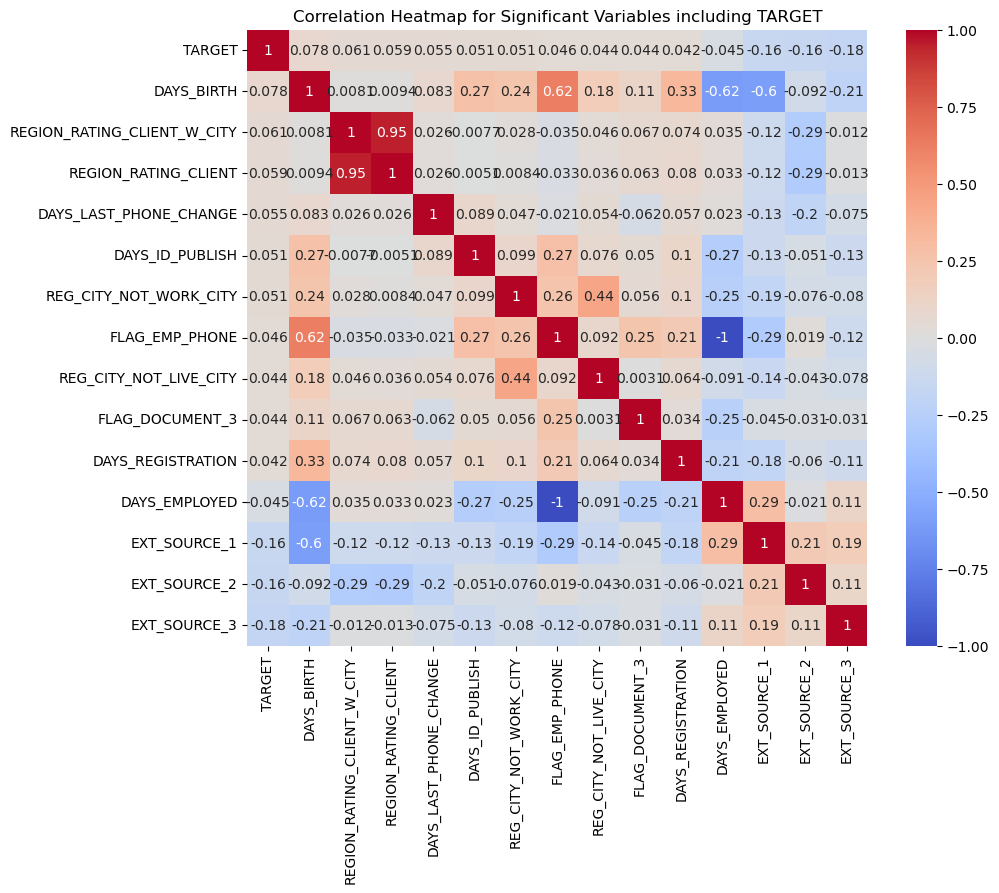

In [9]:
significant_vars = significant_correlations.index
filtered_df = numerical_df[significant_vars]

corr_matrix = filtered_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Significant Variables including TARGET')
plt.show()

*Here we select the categorical columns and then with the help of ANOVA test select the significant categorcal columns*

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns

significant_anova = {}
for column in categorical_columns:
    groups = []
    for group_name, group_data in data.groupby(column):
        groups.append(group_data['TARGET'])
    f_statistic, p_value = f_oneway(*groups)
    if p_value < 0.05:
        significant_anova[column] = p_value

print("Significant ANOVA results:")
for column, p_value in significant_anova.items():
    print(f"{column}: p-value = {p_value}")

Significant ANOVA results:
NAME_CONTRACT_TYPE: p-value = 7.868765336288709e-66
CODE_GENDER: p-value = 5.68463047181333e-201
FLAG_OWN_CAR: p-value = 8.42406300618441e-34
FLAG_OWN_REALTY: p-value = 0.0006507605126378576
NAME_TYPE_SUITE: p-value = 1.1323178379741852e-05
NAME_INCOME_TYPE: p-value = 5.444486885065086e-267
NAME_EDUCATION_TYPE: p-value = 1.0586928233216767e-219
NAME_FAMILY_STATUS: p-value = 6.325709977430293e-107
NAME_HOUSING_TYPE: p-value = 9.556531755607268e-89
OCCUPATION_TYPE: p-value = 3.86636431994646e-289
WEEKDAY_APPR_PROCESS_START: p-value = 0.0174464603790991
ORGANIZATION_TYPE: p-value = 7.334467370336161e-300


*Filtering and combining the signifiacant data columns from the dataframe to to get the final data frame significant_data*

In [11]:
significant_numerical_columns = correlations[abs(correlations) > threshold].index

significant_categorical_columns = list(significant_anova.keys())

significant_columns = list(significant_numerical_columns) + significant_categorical_columns

significant_data = data[significant_columns]

significant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   DAYS_BIRTH                   307511 non-null  int64  
 2   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 3   REGION_RATING_CLIENT         307511 non-null  int64  
 4   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 5   DAYS_ID_PUBLISH              307511 non-null  int64  
 6   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 7   FLAG_EMP_PHONE               307511 non-null  int64  
 8   REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 9   FLAG_DOCUMENT_3              307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_EMPLOYED                307511 non-null  int64  
 12  EXT_SOURCE_1                 134133 non-null  float64
 13 

In [12]:
significant_data.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,-9461,2,2,-1134.0,-2120,0,1,0,1,-3648.0,-637,0.083037,0.262949,0.139376,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,0,-16765,1,1,-828.0,-291,0,1,0,1,-1186.0,-1188,0.311267,0.622246,NaN,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,0,-19046,2,2,-815.0,-2531,0,1,0,0,-4260.0,-225,NaN,0.555912,0.729567,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,0,-19005,2,2,-617.0,-2437,0,1,0,1,-9833.0,-3039,NaN,0.650442,NaN,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,0,-19932,2,2,-1106.0,-3458,1,1,0,0,-4311.0,-3038,NaN,0.322738,NaN,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [13]:
significant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   DAYS_BIRTH                   307511 non-null  int64  
 2   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 3   REGION_RATING_CLIENT         307511 non-null  int64  
 4   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 5   DAYS_ID_PUBLISH              307511 non-null  int64  
 6   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 7   FLAG_EMP_PHONE               307511 non-null  int64  
 8   REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 9   FLAG_DOCUMENT_3              307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_EMPLOYED                307511 non-null  int64  
 12  EXT_SOURCE_1                 134133 non-null  float64
 13 

*Since the time related data is given in days and its harder to deal with them, did converted it to years and months*

In [14]:
significant_data['AGE'] = round(-significant_data['DAYS_BIRTH'] / 365, 1)
significant_data['YEARS_LAST_PHONE_CHANGE'] = round(-significant_data['DAYS_LAST_PHONE_CHANGE'] / 365, 1)
significant_data['YEARS_ID_PUBLISH'] = round(-significant_data['DAYS_ID_PUBLISH'] / 365, 1)
significant_data['YEARS_REGISTRATION'] = round(-significant_data['DAYS_REGISTRATION'] / 365, 1)
significant_data['YEARS_EMPLOYED'] = round(-significant_data['DAYS_EMPLOYED'] / 365, 1)
significant_data.drop(columns=['DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20072\3604652311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_data['AGE'] = round(-significant_data['DAYS_BIRTH'] / 365, 1)
C:\Users\USER\AppData\Local\Temp\ipykernel_20072\3604652311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_data['YEARS_LAST_PHONE_CHANGE'] = round(-significant_data['DAYS_LAST_PHONE_CHANGE'] / 365, 1)
C:\Users\USER\AppData\Local\Temp\ipykernel_20072\3604652311.py:3: SettingWithCopyWarning: 
A value is trying

In [15]:
significant_data.head()

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_REGISTRATION,YEARS_EMPLOYED
0,1,2,2,0,1,0,1,0.083037,0.262949,0.139376,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,25.9,3.1,5.8,10.0,1.7
1,0,1,1,0,1,0,1,0.311267,0.622246,NaN,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,45.9,2.3,0.8,3.2,3.3
2,0,2,2,0,1,0,0,NaN,0.555912,0.729567,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,52.2,2.2,6.9,11.7,0.6
3,0,2,2,0,1,0,1,NaN,0.650442,NaN,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,52.1,1.7,6.7,26.9,8.3
4,0,2,2,1,1,0,0,NaN,0.322738,NaN,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,54.6,3.0,9.5,11.8,8.3


Descriptions of the significant columns

1. **TARGET**: Binary indicator of whether the client with the loan defaulted on payment (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

2. **REGION_RATING_CLIENT_W_CITY**: Our rating of the region where client lives with taking city into account (1,2,3)

3. **REGION_RATING_CLIENT**: Our rating of the region where client lives (1,2,3)

4. **REG_CITY_NOT_WORK_CITY**: Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

5. **FLAG_EMP_PHONE**: Did client provide work phone (1=YES, 0=NO)

6. **REG_CITY_NOT_LIVE_CITY**: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

7. **FLAG_DOCUMENT_3**: Did client provide document 3 (1=YES, 0=NO)

8. **EXT_SOURCE_1**: Normalized score from external data source

9. **EXT_SOURCE_2**: Normalized score from external data source

10. **EXT_SOURCE_3**: Normalized score from external data source

11. **NAME_CONTRACT_TYPE**: Identification if the loan is cash or revolving

12. **CODE_GENDER**: Gender of the client

13. **FLAG_OWN_CAR**: Flag if the client owns a car

14. **FLAG_OWN_REALTY**: Flag if client owns a house or flat

15. **NAME_TYPE_SUITE**: Who accompanied client when applying for the loan

16. **NAME_INCOME_TYPE**: Clients income type (businessman, working, maternity leave,…)

17. **NAME_EDUCATION_TYPE**: Level of highest education the client achieved

18. **NAME_FAMILY_STATUS**: Family status of the client

19. **NAME_HOUSING_TYPE**: What is the housing situation of the client (renting, living with parents, ...)

20. **OCCUPATION_TYPE**: What kind of occupation does the client have

21. **WEEKDAY_APPR_PROCESS_START**: On which day of the week did the client apply for the loan

22. **ORGANIZATION_TYPE**: Type of organization where client works

23. **AGE**: Age of the client

24. **YEARS_LAST_PHONE_CHANGE**: How many days before the application did client change phone

25. **YEARS_ID_PUBLISH**: How many years before the application did client change the identity document with which he applied for the loan

26. **YEARS_REGISTRATION**: How many years before the application did client change the registration

27. **YEARS_EMPLOYED**: How many years before the application the person started current employment

In [16]:
# dropped the 'EXT_SOURCE_1', 'EXT_SOURCE_2' & 'EXT_SOURCE_3' columns since we cant get the information 
columns_to_drop = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
significant_data = significant_data.drop(columns=columns_to_drop, inplace=False)


In [17]:
significant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 2   REGION_RATING_CLIENT         307511 non-null  int64  
 3   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 4   FLAG_EMP_PHONE               307511 non-null  int64  
 5   REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 6   FLAG_DOCUMENT_3              307511 non-null  int64  
 7   NAME_CONTRACT_TYPE           307511 non-null  object 
 8   CODE_GENDER                  307511 non-null  object 
 9   FLAG_OWN_CAR                 307511 non-null  object 
 10  FLAG_OWN_REALTY              307511 non-null  object 
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

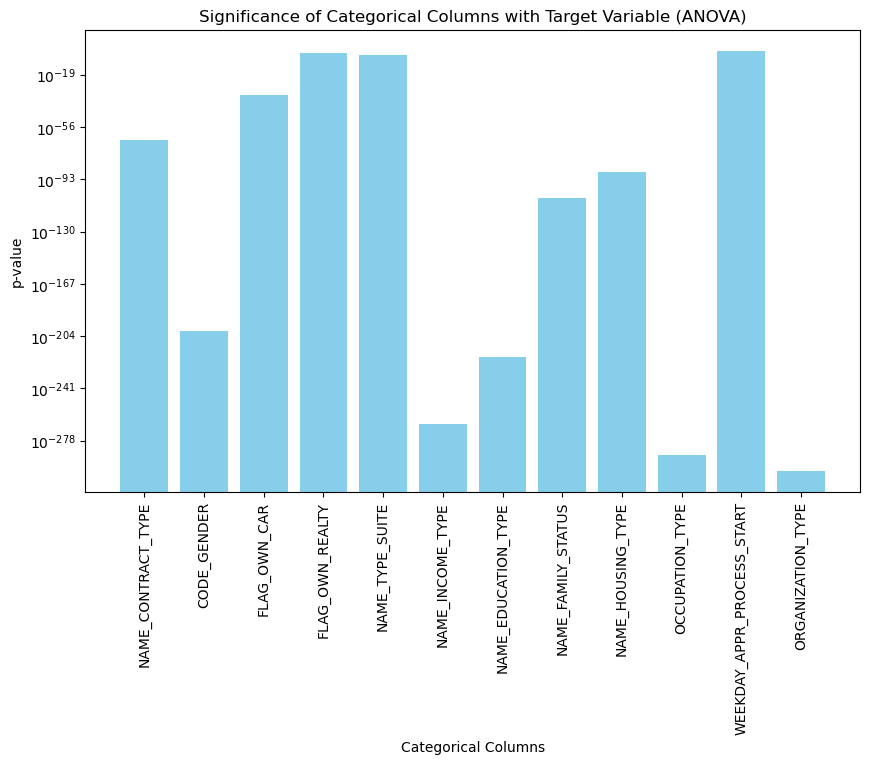

In [18]:
columns = list(significant_anova.keys())
p_values = list(significant_anova.values())

plt.figure(figsize=(10, 6))
plt.bar(columns, p_values, color='skyblue')
plt.xlabel('Categorical Columns')
plt.ylabel('p-value')
plt.title('Significance of Categorical Columns with Target Variable (ANOVA)')
plt.xticks(rotation=90) 
plt.yscale('log')  
plt.show()

Nulls & Missing value handling

In [19]:
# Check missing values
missing_values = significant_data.isnull().sum()
print( missing_values)

TARGET                             0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
REG_CITY_NOT_WORK_CITY             0
FLAG_EMP_PHONE                     0
REG_CITY_NOT_LIVE_CITY             0
FLAG_DOCUMENT_3                    0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
AGE                                0
YEARS_LAST_PHONE_CHANGE            1
YEARS_ID_PUBLISH                   0
YEARS_REGISTRATION                 0
YEARS_EMPLOYED                     0
dtype: int64


checking how to handle the categorical null values by visualising the category

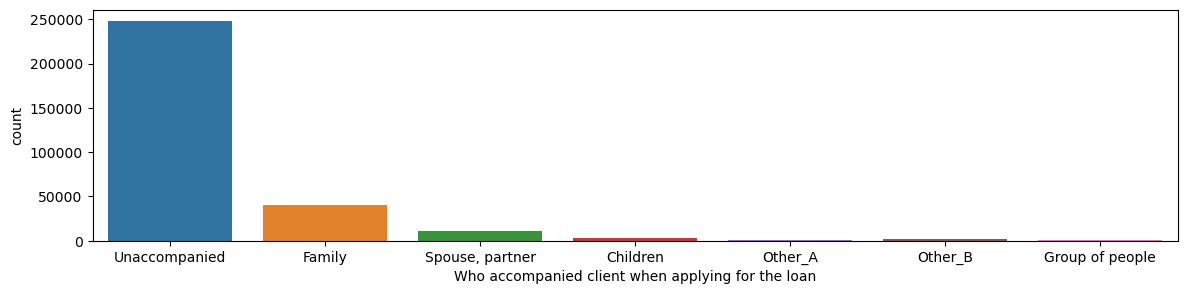

In [20]:
plt.figure(figsize=(14,3))
sns.countplot(data=significant_data, x='NAME_TYPE_SUITE')
plt.xlabel('Who accompanied client when applying for the loan')
plt.show()


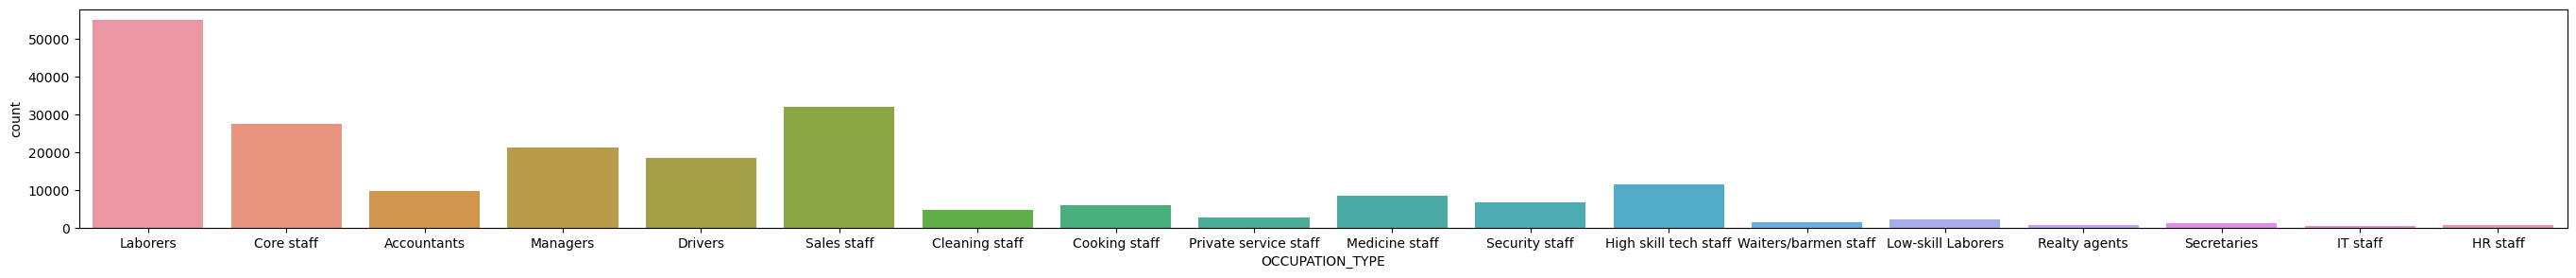

In [21]:
plt.figure(figsize=(34,3))
sns.countplot(data=significant_data, x='OCCUPATION_TYPE')
plt.xlabel('OCCUPATION_TYPE')
plt.show()


In [22]:
# Handling null values
significant_data['NAME_TYPE_SUITE'].fillna('Unknown', inplace=True)
significant_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
significant_data['YEARS_LAST_PHONE_CHANGE'].fillna(significant_data['YEARS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [23]:
significant_data.isnull().sum()

TARGET                         0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
REG_CITY_NOT_WORK_CITY         0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
ORGANIZATION_TYPE              0
AGE                            0
YEARS_LAST_PHONE_CHANGE        0
YEARS_ID_PUBLISH               0
YEARS_REGISTRATION             0
YEARS_EMPLOYED                 0
dtype: int64

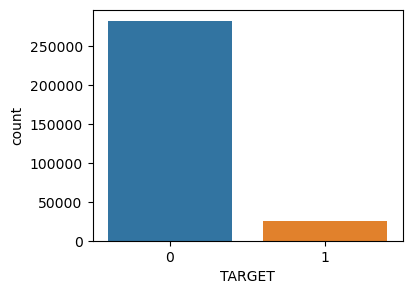

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(data=significant_data, x='TARGET')
plt.xlabel('TARGET')
plt.show()


Encording and normalizing the data 

In [25]:
numerical_columns = significant_data.select_dtypes(include=[np.number]).columns

In [26]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
encoded_labels = {}
Encoded_Scaled_data = significant_data.copy()

for column in Encoded_Scaled_data.columns:
    if Encoded_Scaled_data[column].dtype == 'object':
        Encoded_Scaled_data[column] = label_encoder.fit_transform(Encoded_Scaled_data[column])
        encoded_labels[column] = label_encoder.classes_

Encoded_Scaled_data[numerical_columns] = scaler.fit_transform(Encoded_Scaled_data[numerical_columns])



In [27]:
Encoded_Scaled_data.head()

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_REGISTRATION,YEARS_EMPLOYED
0,3.374485,-0.062699,-0.103064,-0.547236,0.468697,-0.291208,0.639065,0,1,0,1,6,7,4,3,1,8,6,5,-1.508606,0.204051,-0.581106,-0.379256,0.456099
1,-0.296342,-2.051813,-2.067573,-0.547236,0.468697,-0.291208,0.639065,0,0,0,0,1,4,1,1,1,3,1,39,0.164185,-0.149046,-1.790097,-1.083778,0.460233
2,-0.296342,-0.062699,-0.103064,-0.547236,0.468697,-0.291208,-1.564786,1,1,1,1,6,7,4,3,1,8,1,11,0.691114,-0.193183,-0.315127,-0.203125,0.453257
3,-0.296342,-0.062699,-0.103064,-0.547236,0.468697,-0.291208,0.639065,0,0,0,1,6,7,4,0,1,8,6,5,0.682750,-0.413869,-0.363487,1.371689,0.473150
4,-0.296342,-0.062699,-0.103064,1.827367,0.468697,-0.291208,-1.564786,0,1,0,1,6,7,4,3,1,3,4,37,0.891849,0.159914,0.313548,-0.192765,0.473150


Clustering to identify financial stability and risk levels among different groups of clients

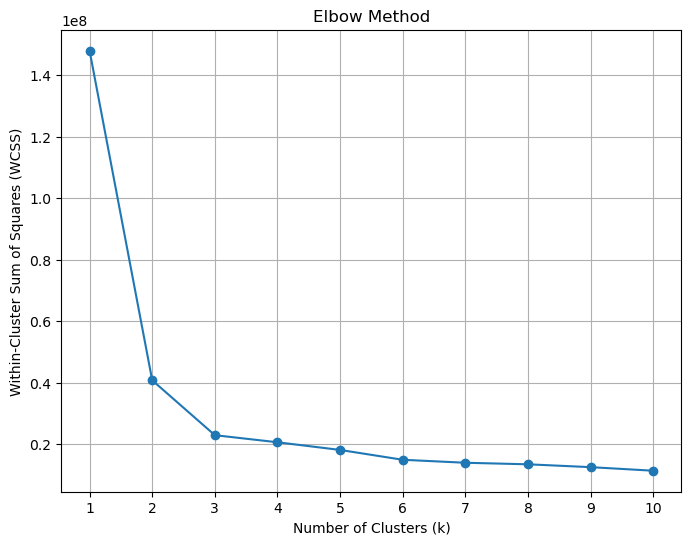

In [28]:
wcss = []

k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Encoded_Scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(Encoded_Scaled_data)

Encoded_Scaled_data['Cluster'] = kmeans.labels_

cluster_distribution = Encoded_Scaled_data['Cluster'].value_counts()

cluster_means = Encoded_Scaled_data.groupby('Cluster').mean()

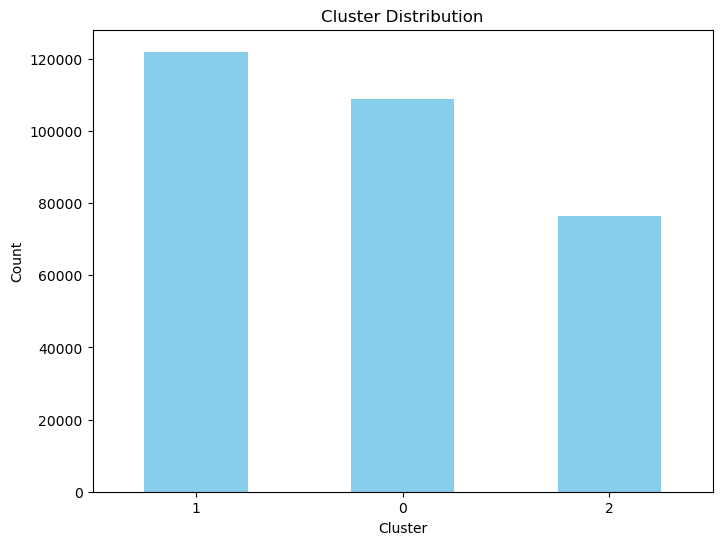

In [30]:
# Plotting the distribution of clusters
plt.figure(figsize=(8, 6))
cluster_distribution.plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

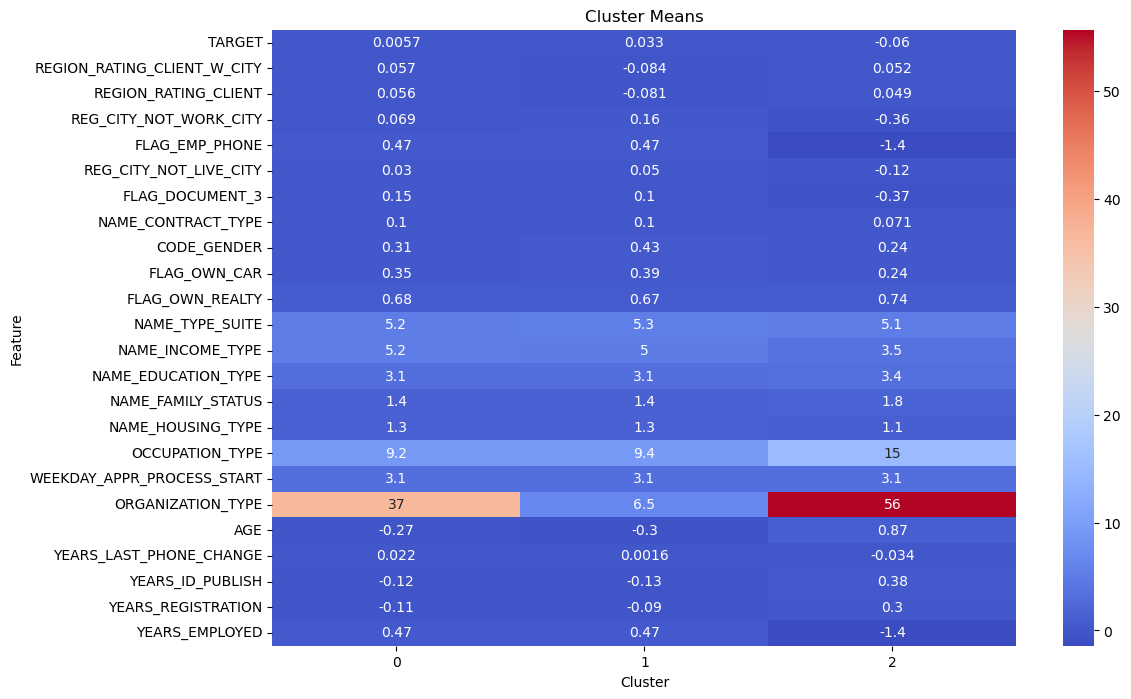

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.transpose(), annot=True, cmap='coolwarm')
plt.title('Cluster Means')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


*Cluster 0*

**Low default rate: Clients rarely miss payments.

**Stable jobs and homes: Many have the same home and work address, own cars and real estate.

**Good documentation: Many provided necessary documents and work phone.

*Cluster 1*

**Medium default rate: More payment issues than Cluster 0.

**Some address mismatch: More clients have different home and work addresses.

**Good job stability: Similar to Cluster 0 in job stability and income.

*Cluster 2*

**High default rate: Clients often miss payments.

**Unstable jobs and homes: Many have different home and work addresses, fewer provided work phones or necessary documents.

**Poor job stability: Less job stability and lower income compared to other clusters.

### Model Building 

In [32]:
Encoded_data = pd.get_dummies(significant_data)
scaler = StandardScaler()
Encoded_Scaled_data = scaler.fit_transform(Encoded_data)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Encoded_Scaled_data, significant_data['TARGET'], test_size=0.2, random_state=42)

Logistic Regression 

In [34]:
Logi_pipeline = Pipeline([('pca', PCA(n_components=2)),('classifier', LogisticRegression())])

Logi_pipeline.fit(X_train, y_train)

accuracy_01 = Logi_pipeline.score(X_test, y_test)
y_pred = Logi_pipeline.predict(X_test)

print("Accuracy:", accuracy_01)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9195323805342829
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


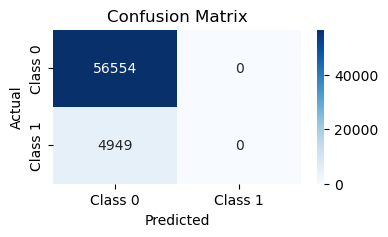

In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

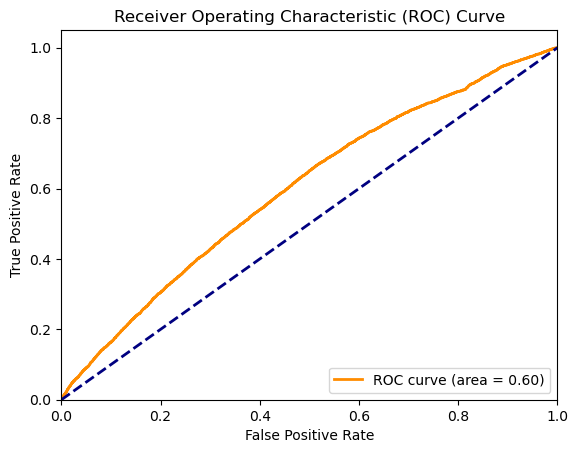

In [36]:
# Get the predicted probabilities for the positive class
y_probs = Logi_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XGBoost

In [37]:
xgb_pipeline = Pipeline([('pca', PCA(n_components=2)),('classifier', XGBClassifier())])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9195161211648212
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



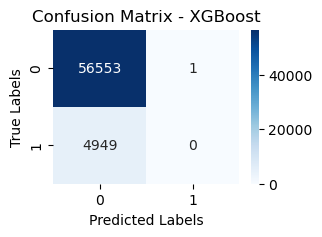

In [38]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

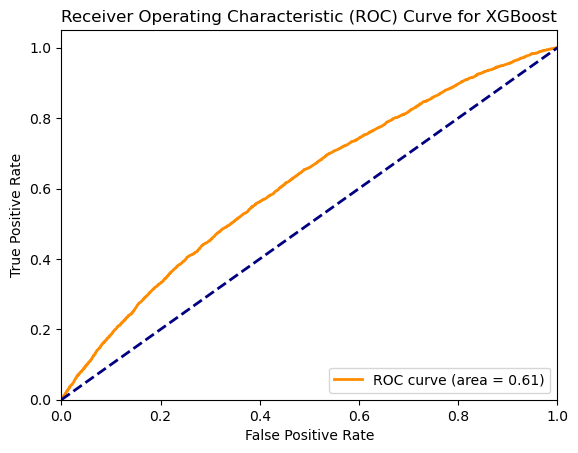

In [39]:
y_probs_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

Perform cross-validation 

In [40]:
pipelines = [Logi_pipeline, xgb_pipeline]
cv_scores = {}

for pipeline in pipelines:
    cv_scores[type(pipeline.named_steps['classifier']).__name__] = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()

for model, score in cv_scores.items():
    print(f"{model}: {score}")

LogisticRegression: 0.9192058795086311
XGBClassifier: 0.9191652304240445


Select the best model based on cross-validation scores

In [41]:
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = [pipeline for pipeline in pipelines if type(pipeline.named_steps['classifier']).__name__ == best_model_name][0]
print(best_model)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('classifier', LogisticRegression())])


Addressing the class imbalance for the selected model and doing a hyperparameter optimisation to get the best parameters for the model

In [42]:
imbalance_pipeline = ImbPipeline([
    ('smote', SMOTE()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

param_grid_logistic = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'classifier__penalty': ['l2', None]  
}

grid_search_logistic_imb = GridSearchCV(imbalance_pipeline, param_grid_logistic, cv=5, n_jobs=-1)
grid_search_logistic_imb.fit(X_train, y_train)

print("Best Parameters:", grid_search_logistic_imb.best_params_)
print("Best Score:", grid_search_logistic_imb.best_score_)

Best Parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Best Score: 0.9969675812145044


Training the final model with optimised parameters and with class inbalance correction

In [43]:
final_model_imb = grid_search_logistic_imb.best_estimator_
final_model_imb.fit(Encoded_Scaled_data, significant_data['TARGET'])

accuracy_final_imb = final_model_imb.score(X_test, y_test)
y_pred_final_imb = final_model_imb.predict(X_test)

print("Final Model Accuracy with Class Imbalance Handling:", accuracy_final_imb)
print("Final Model Classification Report with Class Imbalance Handling:")
print(classification_report(y_test, y_pred_final_imb))


Final Model Accuracy with Class Imbalance Handling: 0.9966180511519763
Final Model Classification Report with Class Imbalance Handling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56554
           1       0.97      0.99      0.98      4949

    accuracy                           1.00     61503
   macro avg       0.98      0.99      0.99     61503
weighted avg       1.00      1.00      1.00     61503



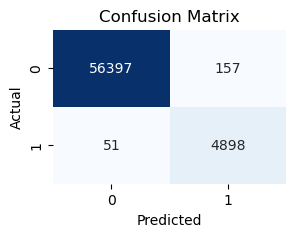

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred_final_imb)

plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

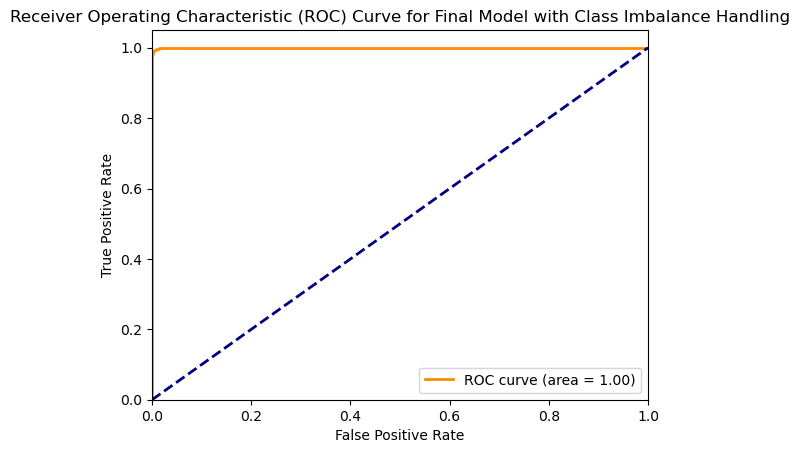

In [45]:
y_probs_final_imb = final_model_imb.predict_proba(X_test)[:, 1]

fpr_final_imb, tpr_final_imb, _ = roc_curve(y_test, y_probs_final_imb)
roc_auc_final_imb = auc(fpr_final_imb, tpr_final_imb)

plt.figure()
lw = 2
plt.plot(fpr_final_imb, tpr_final_imb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_final_imb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model with Class Imbalance Handling')
plt.legend(loc="lower right")
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------